# Практическая работа №2
### Тема: Поиск ассоциативных правил
### Самарин Н.А. КИ21-17/1Б

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import openpyxl
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [14, 8]
matplotlib.rcParams['font.size'] = 12

In [2]:
data =  pd.read_excel("Online Retail.xlsx")
data_temp = data.copy()

In [28]:
data = data_temp

In [29]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [30]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## Вариант 20 - Austria.

## Подготовка данных

In [31]:
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

In [32]:
data = (data[data['Country'] == "Austria"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
try:
    data.drop('POSTAGE', inplace=True, axis=1)
except:
    pass
data = data.applymap(lambda x:0 if x <= 0 else 1)
data

C:\Users\yormu\AppData\Local\Temp\ipykernel_27564\3957753971.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x:0 if x <= 0 else 1)


Description,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,3 PIECE SPACEBOY COOKIE CUTTER SET,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE SKULLS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,...,VINTAGE RED TRIM ENAMEL BOWL,WATERING CAN BLUE ELEPHANT,WATERING CAN GREEN DINOSAUR,WHITE ROCKING HORSE HAND PAINTED,WOOD 2 DRAWER CABINET WHITE FINISH,WOOD STOCKING CHRISTMAS SCANDISPOT,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WRAP RED DOILEY,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
543027,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554132,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


## Генерация частных наборов данных

In [33]:
itemsets = apriori(data, min_support=0.15, use_colnames=True)
itemsets

C:\Projects\SFU\TVO\pr2\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.176471,(BREAD BIN DINER STYLE RED)
1,0.176471,(DOLLY GIRL BABY GIFT SET)
2,0.176471,(DOLLY GIRL LUNCH BOX)
3,0.176471,(LUNCH BOX WITH CUTLERY RETROSPOT)
4,0.176471,(PLASTERS IN TIN CIRCUS PARADE)
...,...,...
66,0.176471,"(DOLLY GIRL BABY GIFT SET, STRAWBERRY LUNCH BO..."
67,0.176471,"(DOLLY GIRL BABY GIFT SET, STRAWBERRY LUNCH BO..."
68,0.176471,"(DOLLY GIRL BABY GIFT SET, STRAWBERRY LUNCH BO..."
69,0.176471,"(STRAWBERRY LUNCH BOX WITH CUTLERY, LUNCH BOX ..."


## Генерация ассоциативных правил

In [34]:
rules = association_rules(itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(LUNCH BOX WITH CUTLERY RETROSPOT),(DOLLY GIRL BABY GIFT SET),0.176471,0.176471,0.176471,1.00,5.666667,0.145329,inf,1.0
1,(DOLLY GIRL BABY GIFT SET),(LUNCH BOX WITH CUTLERY RETROSPOT),0.176471,0.176471,0.176471,1.00,5.666667,0.145329,inf,1.0
2,(RED RETROSPOT BOWL),(DOLLY GIRL BABY GIFT SET),0.176471,0.176471,0.176471,1.00,5.666667,0.145329,inf,1.0
3,(DOLLY GIRL BABY GIFT SET),(RED RETROSPOT BOWL),0.176471,0.176471,0.176471,1.00,5.666667,0.145329,inf,1.0
4,(ROUND SNACK BOXES SET OF 4 FRUITS),(DOLLY GIRL BABY GIFT SET),0.235294,0.176471,0.176471,0.75,4.250000,0.134948,3.294118,1.0
...,...,...,...,...,...,...,...,...,...,...
597,(STRAWBERRY LUNCH BOX WITH CUTLERY),"(DOLLY GIRL BABY GIFT SET, LUNCH BOX WITH CUTL...",0.176471,0.176471,0.176471,1.00,5.666667,0.145329,inf,1.0
598,(LUNCH BOX WITH CUTLERY RETROSPOT),"(DOLLY GIRL BABY GIFT SET, STRAWBERRY LUNCH BO...",0.176471,0.176471,0.176471,1.00,5.666667,0.145329,inf,1.0
599,(RED RETROSPOT BOWL),"(DOLLY GIRL BABY GIFT SET, STRAWBERRY LUNCH BO...",0.176471,0.176471,0.176471,1.00,5.666667,0.145329,inf,1.0
600,(ROUND SNACK BOXES SET OF4 WOODLAND),"(DOLLY GIRL BABY GIFT SET, STRAWBERRY LUNCH BO...",0.235294,0.176471,0.176471,0.75,4.250000,0.134948,3.294118,1.0


## Исследование влияния величины пороговых значений для мер support и confidence на число генерируемых правил.

In [35]:
support = [0.1, 0.2, 0.3, 0.4, 0.5]
confidence = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

rules_size_support = []
rules_size_confidence = []
for i in range(len(support)):
    rules_size_support.append(len(rules[rules["support"] > support[i]]))
for j in range(len(confidence)):
    rules_size_confidence.append(len(rules[rules["confidence"] > confidence[j]]))

In [36]:
def show_plot(param, rules_size, label):
    fig, ax = plt.subplots(figsize=(18, 9))
    plt.plot(param, rules_size, label=label)
    plt.xlabel('Величина порогового значения')
    plt.ylabel('Число генерируемых правил')
    plt.title('Влияние величины порогового значения на число генерируемых правил.')
    plt.legend()
    plt.grid(True)

    plt.show()

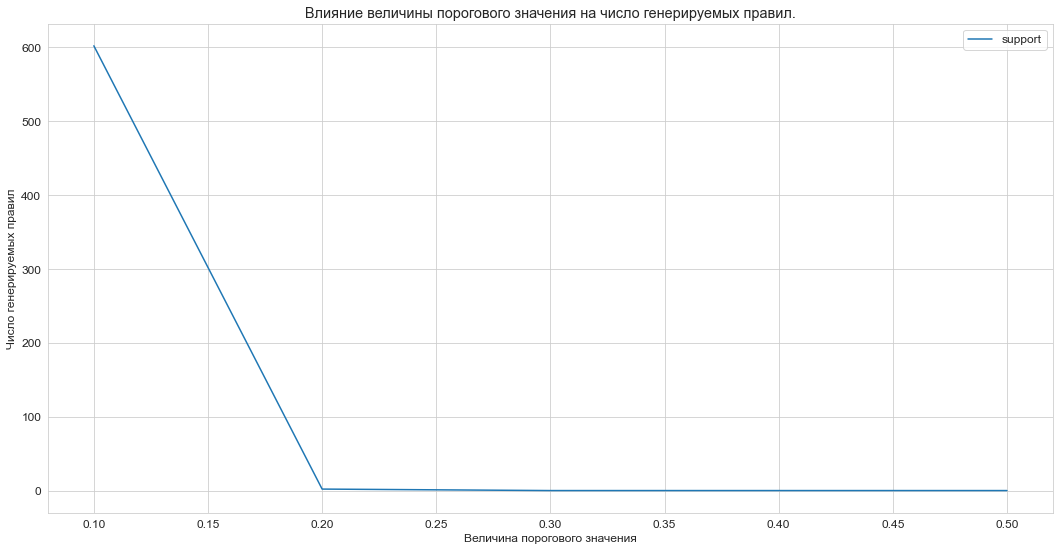

In [37]:
show_plot(support, rules_size_support, "support")

Число генерируемых правил уменьшается при росте support, со значением 0.2 и больше число правил равно нулю

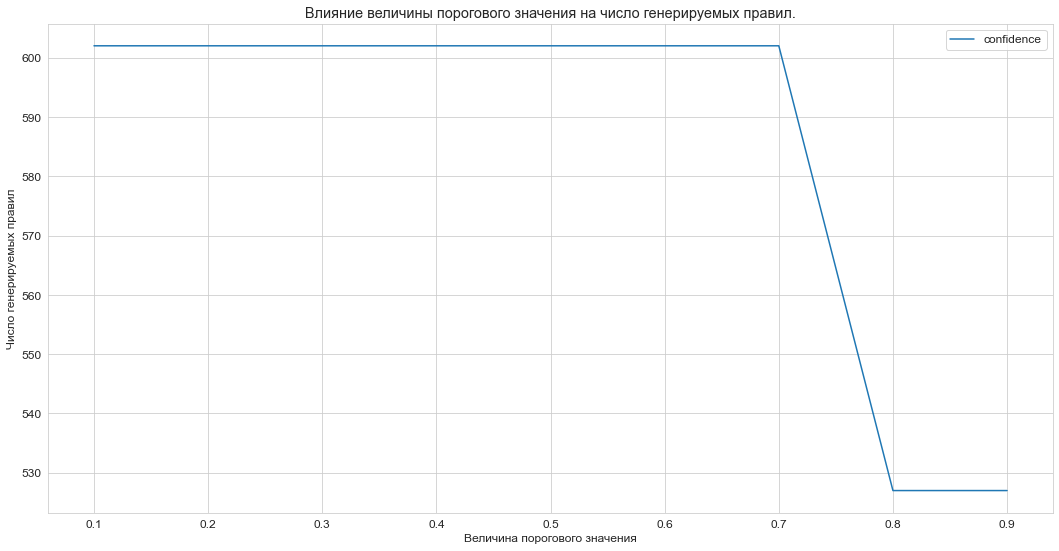

In [38]:
show_plot(confidence, rules_size_confidence, "confidence")

Число генерируемых правил уменьшается при росте confidence свыше 0.7, при росте свыше 0.8 не изменяется

## Визуализация полученных правил

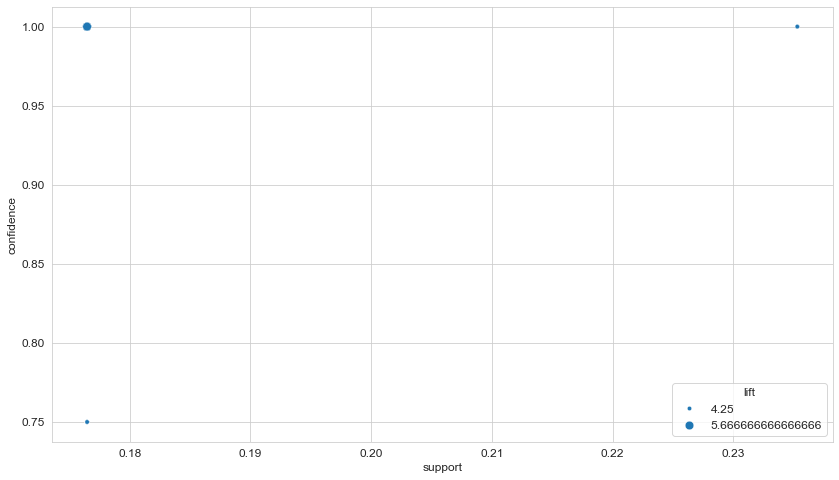

In [39]:
sns.scatterplot(x="support", y="confidence",
                size="lift", data=rules)
plt.show()

С большей достоверности выше значимость

Правила с высокой confidence:

In [40]:
rules[(rules['lift'] >= 5) & (rules['confidence'] > 0.9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(LUNCH BOX WITH CUTLERY RETROSPOT),(DOLLY GIRL BABY GIFT SET),0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0
1,(DOLLY GIRL BABY GIFT SET),(LUNCH BOX WITH CUTLERY RETROSPOT),0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0
2,(RED RETROSPOT BOWL),(DOLLY GIRL BABY GIFT SET),0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0
3,(DOLLY GIRL BABY GIFT SET),(RED RETROSPOT BOWL),0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0
8,(STRAWBERRY LUNCH BOX WITH CUTLERY),(DOLLY GIRL BABY GIFT SET),0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
594,"(ROUND SNACK BOXES SET OF 4 FRUITS, RED RETROS...","(LUNCH BOX WITH CUTLERY RETROSPOT, STRAWBERRY ...",0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0
596,(DOLLY GIRL BABY GIFT SET),"(STRAWBERRY LUNCH BOX WITH CUTLERY, LUNCH BOX ...",0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0
597,(STRAWBERRY LUNCH BOX WITH CUTLERY),"(DOLLY GIRL BABY GIFT SET, LUNCH BOX WITH CUTL...",0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0
598,(LUNCH BOX WITH CUTLERY RETROSPOT),"(DOLLY GIRL BABY GIFT SET, STRAWBERRY LUNCH BO...",0.176471,0.176471,0.176471,1.0,5.666667,0.145329,inf,1.0


Тк conviction у правил = inf, можно сказать, что правила тривиальные

Правила с confidence болльше 0.5:

In [41]:
rules[(rules['confidence'] < 1) & (rules['confidence'] > 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(ROUND SNACK BOXES SET OF 4 FRUITS),(DOLLY GIRL BABY GIFT SET),0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0
6,(ROUND SNACK BOXES SET OF4 WOODLAND),(DOLLY GIRL BABY GIFT SET),0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0
13,(ROUND SNACK BOXES SET OF 4 FRUITS),(LUNCH BOX WITH CUTLERY RETROSPOT),0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0
15,(ROUND SNACK BOXES SET OF4 WOODLAND),(LUNCH BOX WITH CUTLERY RETROSPOT),0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0
18,(ROUND SNACK BOXES SET OF 4 FRUITS),(RED RETROSPOT BOWL),0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0
...,...,...,...,...,...,...,...,...,...,...
538,(ROUND SNACK BOXES SET OF4 WOODLAND),"(LUNCH BOX WITH CUTLERY RETROSPOT, ROUND SNACK...",0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0
539,(ROUND SNACK BOXES SET OF 4 FRUITS),"(LUNCH BOX WITH CUTLERY RETROSPOT, STRAWBERRY ...",0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0
595,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC...","(LUNCH BOX WITH CUTLERY RETROSPOT, STRAWBERRY ...",0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0
600,(ROUND SNACK BOXES SET OF4 WOODLAND),"(DOLLY GIRL BABY GIFT SET, STRAWBERRY LUNCH BO...",0.235294,0.176471,0.176471,0.75,4.25,0.134948,3.294118,1.0


Правила выше - нетривиальные

## Исследование для другой страны (Cyprus)

## Подготовка данных

In [42]:
data = data_temp.copy()
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]
data = (data[data['Country'] == "Cyprus"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
try:
    data.drop('POSTAGE', inplace=True, axis=1)
except:
    pass
data

Description,12 PENCILS SMALL TUBE SKULL,12 RED ROSE PEG PLACE SETTINGS,20 DOLLY PEGS RETROSPOT,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3D HEARTS HONEYCOMB PAPER GARLAND,ABC TREASURE BOOK BOX,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,...,WOOD STAMP SET THANK YOU,WOODEN FRAME ANTIQUE WHITE,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN OWLS LIGHT GARLAND,WRAP ALPHABET DESIGN,WRAP WEDDING DAY,YELLOW COAT RACK PARIS FASHION,ZINC BOX SIGN HOME,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
538826,6.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,24.0,0.0,...,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0
540946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543370,0.0,0.0,12.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25.0,25.0,3.0,0.0,0.0,0.0
544097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
544331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
data = data.applymap(lambda x:0 if x <= 0 else 1)
data

C:\Users\yormu\AppData\Local\Temp\ipykernel_27564\4276584895.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x:0 if x <= 0 else 1)


Description,12 PENCILS SMALL TUBE SKULL,12 RED ROSE PEG PLACE SETTINGS,20 DOLLY PEGS RETROSPOT,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3D HEARTS HONEYCOMB PAPER GARLAND,ABC TREASURE BOOK BOX,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,...,WOOD STAMP SET THANK YOU,WOODEN FRAME ANTIQUE WHITE,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN OWLS LIGHT GARLAND,WRAP ALPHABET DESIGN,WRAP WEDDING DAY,YELLOW COAT RACK PARIS FASHION,ZINC BOX SIGN HOME,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
538826,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
540946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543350,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
543370,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
544097,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
544331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Генерация частных наборов данных

In [44]:
itemsets = apriori(data, min_support=0.15, use_colnames=True)
itemsets

C:\Projects\SFU\TVO\pr2\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.1875,(CANDLEHOLDER PINK HANGING HEART)
1,0.1875,(CERAMIC CAKE STAND + HANGING CAKES)
2,0.1875,(FELTCRAFT CUSHION OWL)
3,0.1875,(FELTCRAFT DOLL EMILY)
4,0.1875,(FELTCRAFT PRINCESS CHARLOTTE DOLL)
5,0.1875,(GREEN REGENCY TEACUP AND SAUCER)
6,0.1875,(LANTERN CREAM GAZEBO)
7,0.1875,(PARTY BUNTING)
8,0.1875,(PARTY CONES CANDY ASSORTED)
9,0.1875,(PINK FLORAL FELTCRAFT SHOULDER BAG)


## Генерация ассоциативных правил

In [45]:
rules = association_rules(itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WHITE HANGING HEART T-LIGHT HOLDER),(CANDLEHOLDER PINK HANGING HEART),0.3125,0.1875,0.1875,0.6,3.200000,0.128906,2.03125,1.000000
1,(CANDLEHOLDER PINK HANGING HEART),(WHITE HANGING HEART T-LIGHT HOLDER),0.1875,0.3125,0.1875,1.0,3.200000,0.128906,inf,0.846154
2,(FELTCRAFT CUSHION OWL),(LANTERN CREAM GAZEBO),0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.000000
3,(LANTERN CREAM GAZEBO),(FELTCRAFT CUSHION OWL),0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.000000
4,(FELTCRAFT CUSHION OWL),(PINK FLORAL FELTCRAFT SHOULDER BAG),0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
187,(LANTERN CREAM GAZEBO),"(PINK FLORAL FELTCRAFT SHOULDER BAG, WHITE TAL...",0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.000000
188,(WHITE TALL PORCELAIN T-LIGHT HOLDER),"(PINK FLORAL FELTCRAFT SHOULDER BAG, LANTERN C...",0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.000000
189,(RED FLORAL FELTCRAFT SHOULDER BAG),"(FELTCRAFT CUSHION OWL, LANTERN CREAM GAZEBO, ...",0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.000000
190,(PINK FLORAL FELTCRAFT SHOULDER BAG),"(FELTCRAFT CUSHION OWL, LANTERN CREAM GAZEBO, ...",0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.000000


## Исследование влияния величины пороговых значений для мер support и confidence на число генерируемых правил.

In [46]:
support = [0.1, 0.2, 0.3, 0.4]
confidence = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

rules_size_support = []
rules_size_confidence = []
for i in range(len(support)):
    rules_size_support.append(len(rules[rules["support"] > support[i]]))
for j in range(len(confidence)):
    rules_size_confidence.append(len(rules[rules["confidence"] > confidence[j]]))

In [47]:
def show_plot(param, rules_size, label):
    fig, ax = plt.subplots(figsize=(18, 9))

    plt.plot(param, rules_size, label=label)

    plt.xlabel('Величина порогового значения')
    plt.ylabel('Число генерируемых правил')
    plt.title('Влияние величины порогового значения на число генерируемых правил.')
    plt.legend()
    plt.grid(True)

    plt.show()

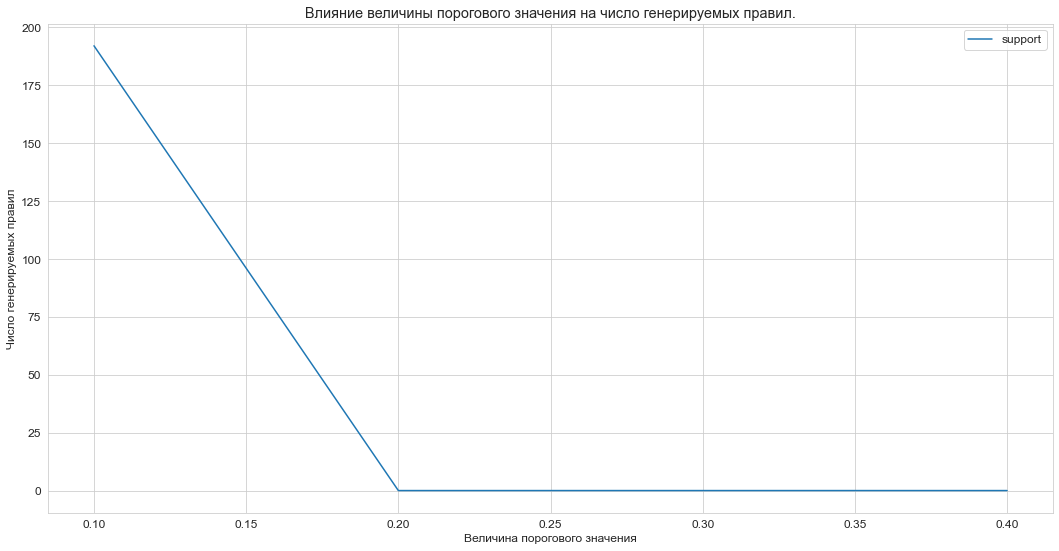

In [48]:
show_plot(support, rules_size_support, "support")

Число генерируемых правил уменьшается с ростом support и достигает нуля при значении 0.2

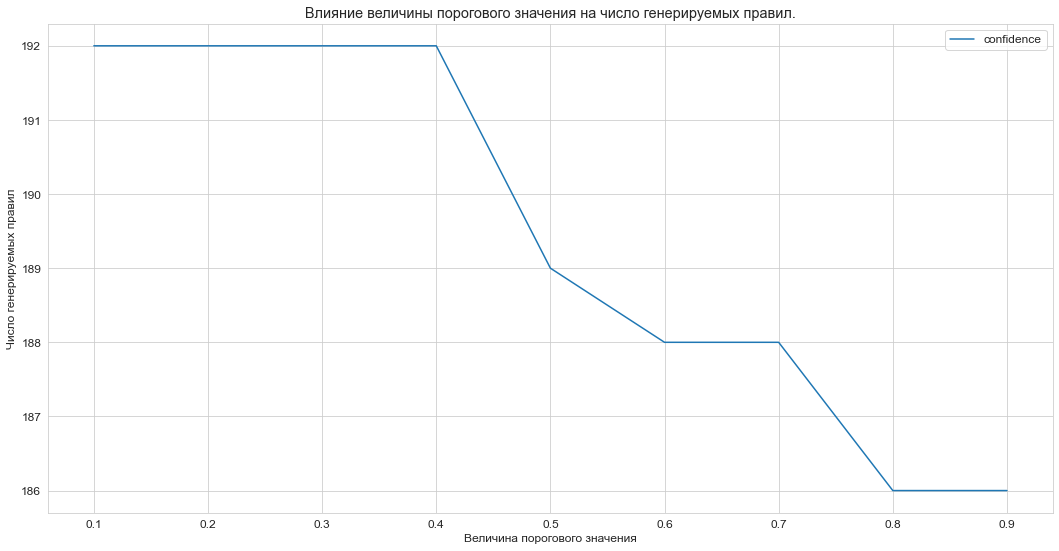

In [49]:
show_plot(confidence, rules_size_confidence, "confidence")

Число генерируемых правил уменьшается с ростом confidence

## Визуализация полученных правил

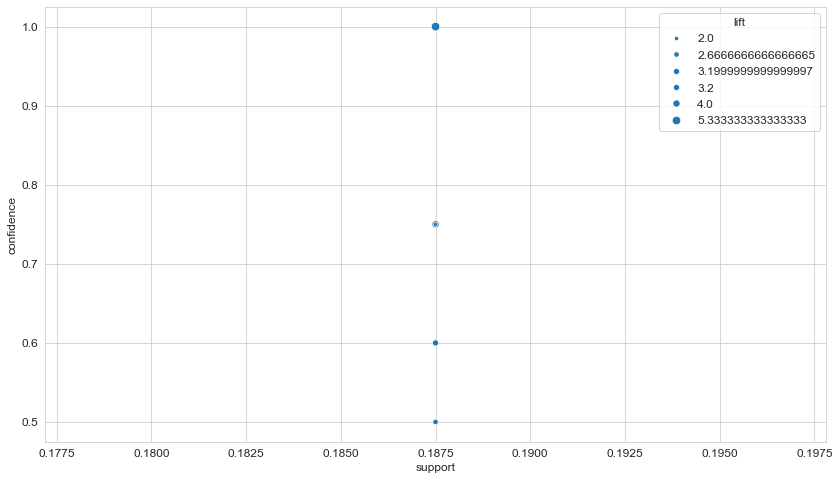

In [50]:
sns.scatterplot(x="support", y="confidence",
                size="lift", data=rules)
plt.show()

С ростом confidence растет значимость

Правила с высокой confidence:

In [51]:
rules[(rules['lift'] >= 5) & (rules['confidence'] > 0.9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(FELTCRAFT CUSHION OWL),(LANTERN CREAM GAZEBO),0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0
3,(LANTERN CREAM GAZEBO),(FELTCRAFT CUSHION OWL),0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0
4,(FELTCRAFT CUSHION OWL),(PINK FLORAL FELTCRAFT SHOULDER BAG),0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0
5,(PINK FLORAL FELTCRAFT SHOULDER BAG),(FELTCRAFT CUSHION OWL),0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0
6,(FELTCRAFT CUSHION OWL),(RED FLORAL FELTCRAFT SHOULDER BAG),0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
187,(LANTERN CREAM GAZEBO),"(PINK FLORAL FELTCRAFT SHOULDER BAG, WHITE TAL...",0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0
188,(WHITE TALL PORCELAIN T-LIGHT HOLDER),"(PINK FLORAL FELTCRAFT SHOULDER BAG, LANTERN C...",0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0
189,(RED FLORAL FELTCRAFT SHOULDER BAG),"(FELTCRAFT CUSHION OWL, LANTERN CREAM GAZEBO, ...",0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0
190,(PINK FLORAL FELTCRAFT SHOULDER BAG),"(FELTCRAFT CUSHION OWL, LANTERN CREAM GAZEBO, ...",0.1875,0.1875,0.1875,1.0,5.333333,0.152344,inf,1.0


Тк conviction у правил = inf, можно сказать, что правила тривиальные

Правила с confidence болльше 0.5:

In [52]:
rules[(rules['confidence'] < 1) & (rules['confidence'] > 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WHITE HANGING HEART T-LIGHT HOLDER),(CANDLEHOLDER PINK HANGING HEART),0.3125,0.1875,0.1875,0.60,3.2,0.128906,2.03125,1.000000
13,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.2500,0.1875,0.1875,0.75,4.0,0.140625,3.25000,1.000000
27,(ROSES REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.2500,0.3750,0.1875,0.75,2.0,0.093750,2.50000,0.666667


Правила выше - нетривиальные

## Сравнение результатов

Правил с высокой достоверностью(confidence) больше у Austria, также выше lift. Support немного выше у Cyprus. У обоих стран много тривиальных правил, у Cyprus относительно больше.